In [1]:
import pandas as pd
import numpy as np
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./world_data_full_apply_nulos.csv", index_col = 0 ) 
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [7]:
df.describe().T[["min", "max", "mean", "50%"]]

,min,max,mean,50%
density,1.265000e+00,8.470000e+02,1.345045e+02,8.300000e+01
agricultural_land,6.000000e-01,8.260000e+01,3.911755e+01,3.960000e+01
land_area,0.000000e+00,9.640000e+02,2.552127e+02,1.484600e+02
armed_forces_size,0.000000e+00,9.360000e+02,1.037831e+02,2.850000e+01
birth_rate,5.900000e+00,4.608000e+01,2.021497e+01,1.795000e+01
calling_code,1.000000e+00,1.876000e+03,3.605464e+02,2.555000e+02
co2-emissions,1.016000e+00,7.279730e+02,1.259155e+02,3.447700e+01
cpi,9.903000e+01,5.509300e+02,1.441936e+02,1.247400e+02
cpi_change,-4.300000e+00,2.549000e+02,6.722346e+00,2.300000e+00
fertility_rate,9.800000e-01,6.910000e+00,2.698138e+00,2.245000e+00


In [11]:
minimo= df.loc[df['density'].idxmin(), 'country']
print(f"el pais con menor densidad  de poblacion es: {minimo}")

el pais con menor densidad  de poblacion es: Bangladesh


In [12]:
max= df.loc[df['density'].idxmax(), 'country']
print(f"el pais con mayor densidad  de poblacion es: {max}")

el pais con mayor densidad  de poblacion es: Palestinian National Authority


In [13]:
tasa_nat = df["birth_rate"].mean()


20.21497354497354

In [18]:
df["infant_mortality"].describe().T

count    189.000000
mean      21.332804
std       19.548058
min        1.400000
25%        6.000000
50%       14.000000
75%       32.700000
max       84.500000
Name: infant_mortality, dtype: float64

In [19]:
baja= 10
alta = 50 

def clasif_mortal_infa(fila):
    if fila["infant_mortality"]< baja:
        return "baja"
    elif fila["infant_mortality"]>= baja and fila["infant_mortality"]<= alta:
        return "moderada"
    elif fila["infant_mortality"]> alta: 
        return "alta"
    else: 
        return fila 



In [21]:
df["clasificacion"]= df.apply(clasif_mortal_infa, axis= 1)
df[["country","infant_mortality", "clasificacion"]]

,country,infant_mortality,clasificacion
0,Afghanistan,47.9,moderada
1,Albania,7.8,baja
2,Algeria,20.1,moderada
3,Andorra,2.7,baja
4,Angola,51.6,alta
...,...,...,...
190,Venezuela,21.4,moderada
191,Vietnam,16.5,moderada
192,Yemen,42.9,moderada
193,Zambia,40.4,moderada


In [24]:
df_variables = df[['fertility_rate', 'life_expectancy']]
df_corr = df_variables.corr(method = "spearman")
df_corr

,fertility_rate,life_expectancy
fertility_rate,1.000000,-0.843047
life_expectancy,-0.843047,1.000000


la correlacion que existe entre estas dos varibles es negtiva 

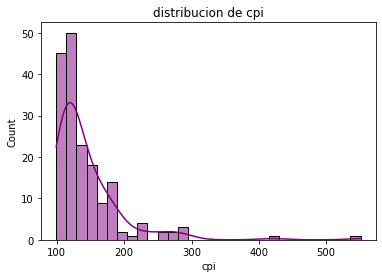

In [26]:
sns.histplot(data= df, x="cpi", kde= True, color= "purple")

plt.xlabel("cpi")
plt.title("distribucion de cpi");


LOS DATOS EN CPI ESTAN BASTANTE DISPERSOS 

In [27]:
df["diferencia"]= df["gdp"]- df["co2-emissions"]

max2= df.loc[df['diferencia'].idxmax(), 'country']
max2


'Germany'

In [29]:
df["population_labor_force_participation"].mean()

62.73806818181817

In [30]:
from itertools import combinations
# definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
# printeamos los resultados, una lista de tuplas
combinaciones

[('density', 'agricultural_land'),
 ('density', 'land_area'),
 ('density', 'armed_forces_size'),
 ('density', 'birth_rate'),
 ('density', 'calling_code'),
 ('density', 'co2-emissions'),
 ('density', 'cpi'),
 ('density', 'cpi_change'),
 ('density', 'fertility_rate'),
 ('density', 'forested_area'),
 ('density', 'gasoline_price'),
 ('density', 'gdp'),
 ('density', 'gross_primary_education_enrollment'),
 ('density', 'gross_tertiary_education_enrollment'),
 ('density', 'infant_mortality'),
 ('density', 'life_expectancy'),
 ('density', 'maternal_mortality_ratio'),
 ('density', 'minimum_wage'),
 ('density', 'out_of_pocket_health_expenditure'),
 ('density', 'physicians_per_thousand'),
 ('density', 'population'),
 ('density', 'population_labor_force_participation'),
 ('density', 'tax_revenue'),
 ('density', 'total_tax_rate'),
 ('density', 'unemployment_rate'),
 ('density', 'urban_population'),
 ('density', 'latitude'),
 ('density', 'longitude'),
 ('density', 'diferencia'),
 ('agricultural_land'

In [31]:
df_correlaciones = df.corr(method = "spearman")
df_correlaciones

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,diferencia
density,1.000000,0.200302,-0.220539,0.125936,-0.176731,-0.109384,0.209351,-0.119915,-0.138960,-0.176856,-0.015206,0.104546,-0.004021,0.033382,-0.012201,-0.095937,0.135093,-0.098955,0.061765,0.014885,0.026946,-0.511743,-0.090923,0.094292,0.023721,-0.152447,-0.359084,0.116068,0.021248,0.006759
agricultural_land,0.200302,1.000000,0.022158,0.173127,0.173660,-0.036252,0.015142,0.249278,0.232981,0.164436,-0.382159,0.031457,0.078430,-0.060903,-0.132087,0.200319,-0.221712,0.146761,-0.191189,0.111157,-0.080401,-0.140550,-0.150819,-0.072350,0.159252,0.055847,-0.025796,0.004682,-0.012907,0.075940
land_area,-0.220539,0.022158,1.000000,0.384287,0.178757,-0.242378,0.166552,0.136854,0.224723,0.175796,-0.008680,-0.089567,0.171319,0.022693,-0.071133,0.222185,-0.176727,0.179866,-0.097304,0.112200,-0.210800,-0.398381,0.033388,-0.209875,0.162818,0.005533,-0.485771,-0.158250,0.047216,0.129286
armed_forces_size,0.125936,0.173127,0.384287,1.000000,-0.118602,-0.241026,0.477055,0.094123,0.084370,-0.095454,-0.153847,-0.197941,0.696120,-0.000946,0.255177,-0.104961,0.162024,-0.130828,0.097284,0.259397,0.120254,0.806751,-0.121036,-0.234878,0.162857,-0.090453,0.476780,0.123754,0.234507,0.692158
birth_rate,-0.176731,0.173660,0.178757,-0.118602,1.000000,0.164103,-0.246307,0.391884,0.237546,0.980987,-0.084387,-0.302687,-0.416506,0.064180,-0.787452,0.895507,-0.859974,0.856945,-0.657015,0.245818,-0.845314,0.349382,0.213206,-0.397999,0.168458,-0.055770,0.106992,-0.596338,0.040054,-0.431593
calling_code,-0.109384,-0.036252,-0.242378,-0.241026,0.164103,1.000000,-0.265872,0.105980,-0.016856,0.164907,-0.085191,-0.143463,-0.356442,-0.068676,-0.227563,0.106171,-0.154025,0.051555,-0.151760,-0.054249,-0.074278,0.047469,0.084262,0.005102,-0.334636,-0.091476,-0.163097,-0.043635,0.304064,-0.315823
co2-emissions,0.209351,0.015142,0.166552,0.477055,-0.246307,-0.265872,1.000000,-0.142751,-0.131654,-0.205801,0.003200,0.031760,0.300473,0.080741,0.266869,-0.254783,0.261146,-0.292307,0.378285,-0.180222,0.192914,-0.345963,-0.148427,0.023486,0.065845,-0.002232,-0.349605,0.136520,0.060003,0.300473
cpi,-0.119915,0.249278,0.136854,0.094123,0.391884,0.105980,-0.142751,1.000000,0.804287,0.359507,-0.091008,-0.325114,0.008686,0.149329,-0.291723,0.419904,-0.422903,0.415222,-0.475015,0.185645,-0.293830,0.219941,0.039076,-0.320285,0.092007,0.023119,0.265291,-0.261395,0.164743,-0.004117
cpi_change,-0.138960,0.232981,0.224723,0.084370,0.237546,-0.016856,-0.131654,0.804287,1.000000,0.216461,-0.033153,-0.146547,0.020980,0.043075,-0.173455,0.283011,-0.314851,0.273891,-0.320803,0.155117,-0.187636,0.201357,-0.048238,-0.237048,0.095983,0.159493,0.153673,-0.103437,0.034444,-0.010097
fertility_rate,-0.176856,0.164436,0.175796,-0.095454,0.980987,0.164907,-0.205801,0.359507,0.216461,1.000000,-0.071624,-0.280087,-0.417396,0.050522,-0.760185,0.867469,-0.843047,0.830900,-0.604140,0.187757,-0.817209,0.174954,0.191111,-0.391246,0.171121,-0.071483,-0.020917,-0.578658,0.037592,-0.418319


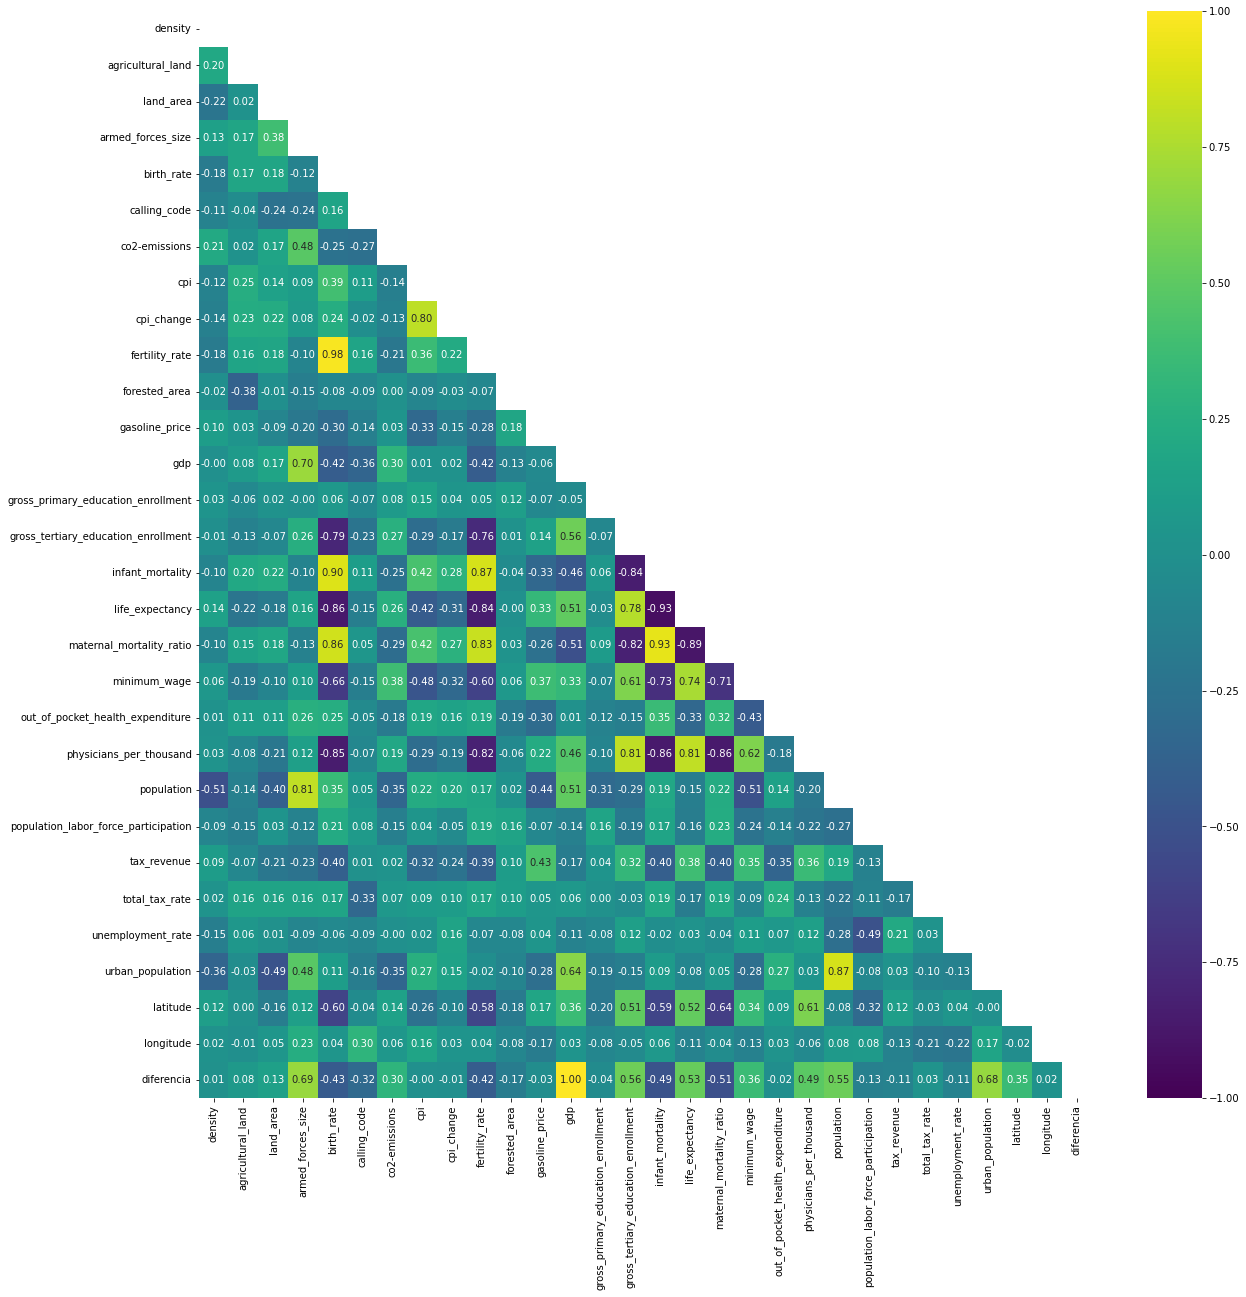

In [36]:
plt.figure(figsize = (20, 20))
# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))
# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "viridis", 
            vmax = 1, 
            vmin = -1, 
            mask = mask);